Content

1. Question 3                                                                                                                              Instacart has a lot of products with different price tags. Marketing and sales want to use simpler price range groupings to help        direct their efforts.

2. Question 4.                                                                                                                            Are there certain types of products that are more popular than others? The marketing and sales teams want to know which departments    have the highest frequency of product orders.

3. Question 5.1                                                                                                                            What’s the distribution among users in regards to their brand loyalty (i.e., how often do they return to Instacart)?

4. Question 5.2                                                                                                                            Are there differences in ordering habits based on a customer’s loyalty status?

5. Question 5.3                                                                                                                           Are there differences in ordering habits based on a customer’s region?

6. Question 5.4 
  Is there a connection between age and family status in terms of ordering habits?
  
7. Question 5.5                                                                                                                            What different classifications does the demographic information suggest? Age? Income? Certain types of goods? Family status?

8. Question 5.6                                                                                                                            What differences can you find in ordering habits of different customer profiles? Consider the price of orders, the frequency of        orders, the products customers are ordering, and anything else you can think of.

In [1]:
# import library
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# import data set
all_order = pd.read_pickle(r'D:\ドキュメント\Jupyter\CareerFoundry Achievement 4\02 Data\Prepared Data\all_order.pkl')

In [3]:
# show all column
pd.set_option('display.max_columns', 50)

# 1. Question 3. Instacart has a lot of products with different price tags. Marketing and sales want to use simpler price range groupings to help        direct their efforts.

In [4]:
def price_label(row):
# create new column for price range
  if (row['prices'] <= 5):
    return 'Low_range'
  elif (row['prices'] > 5) and (row['prices'] <= 15):
    return 'Mid_range'
  elif (row['prices'] > 15):
    return 'High_range'
  else: return 'Not enough data'
    
all_order['Price_range'] = all_order.apply(price_label, axis=1)

<AxesSubplot:>

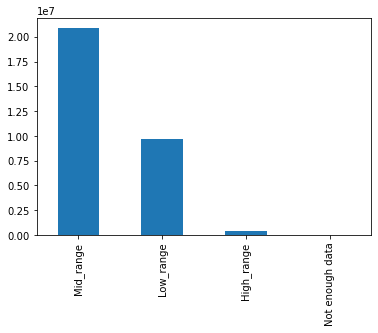

In [5]:
# make a graph
all_order['Price_range'].value_counts().plot.bar()

Mid range products has the highest number of order

# 2. Question 4. Are there certain types of products that are more popular than others? The marketing and sales teams want to know which departments have the highest frequency of product orders.

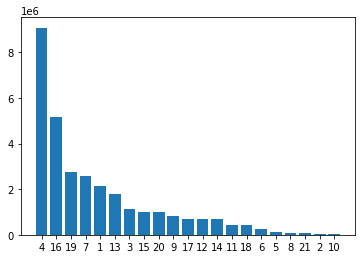

In [6]:
# number of order by department
depart_rank = plt.figure()
label = ['4', '16', '19', '7', '1','13','3','15','20','9','17','12','14','11','18','6','5','8','21','2','10']
value = all_order['department_id'].value_counts()
depart_nr = plt.bar(label, value)
depart_rank.savefig(r'D:\ドキュメント\Jupyter\CareerFoundry Achievement 4\04 Analysis\Visualizations\popular_product_type.png')

# 3. Question 5.1  What’s the distribution among users in regards to their brand loyalty (i.e., how often do they return to Instacart)?

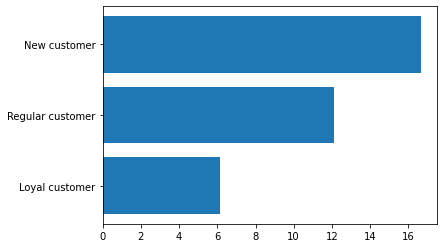

In [7]:
# Average days since prior order by loyality
loyality_days = plt.figure()
x = [1,2,3]
y = [6.12,12.10,16.68]
labels = ["Loyal customer","Regular customer","New customer"]
plt.barh(x, y, align="center") 
plt.yticks(x, labels)
plt.show()
loyality_days.savefig(r'D:\ドキュメント\Jupyter\CareerFoundry Achievement 4\04 Analysis\Visualizations\loyality_days.png',bbox_inches="tight")

Loyal customer relatively return the shop in short days

# 4. Question 5.2 Are there differences in ordering habits based on a customer’s loyalty status?

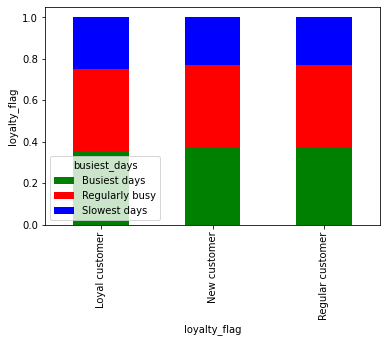

In [8]:
# Percentage of day of week of placing order by loyalty customers
crosstab_12 = pd.crosstab(all_order['loyalty_flag'], all_order['busiest_days'], normalize='index')
ax = plt.subplot()
crosstab_12.plot.bar(stacked=True, color=['green','red','blue'], ax=ax)
ax.set_ylabel('loyalty_flag')
plt.show()
ax.figure.savefig(r'D:\ドキュメント\Jupyter\CareerFoundry Achievement 4\04 Analysis\Visualizations\loyality_habit.png',bbox_inches="tight")

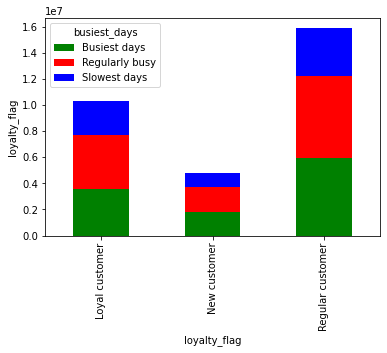

In [9]:
# Number of day of week of placing order by loyalty customers
crosstab_13 = pd.crosstab(all_order['loyalty_flag'], all_order['busiest_days'])
ax = plt.subplot()
crosstab_13.plot.bar(stacked=True, color=['green','red','blue'], ax=ax)
ax.set_ylabel('loyalty_flag')
plt.show()
ax.figure.savefig(r'D:\ドキュメント\Jupyter\CareerFoundry Achievement 4\04 Analysis\Visualizations\loyality_habit1.png',bbox_inches="tight")

There is more order from a regular customer. Still, in terms of placing the order in a week, slightly loyal customers place orders on the slowest days instead of busy days,

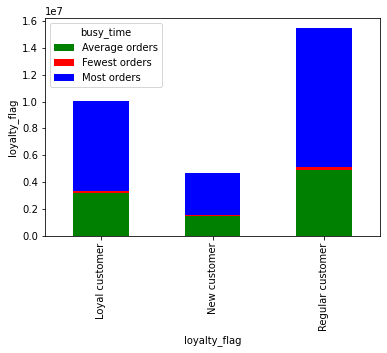

In [10]:
# Number of time of the day of placing order by loyalty customers
crosstab_15 = pd.crosstab(all_order['loyalty_flag'], all_order['busy_time'])
ax = plt.subplot()
crosstab_15.plot.bar(stacked=True, color=['green','red','blue'], ax=ax)
ax.set_ylabel('loyalty_flag')
plt.show()
ax.figure.savefig(r'D:\ドキュメント\Jupyter\CareerFoundry Achievement 4\04 Analysis\Visualizations\loyality_habit1.png',bbox_inches="tight")

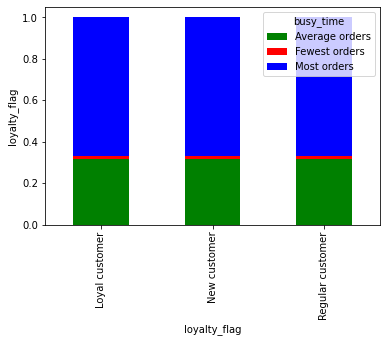

In [11]:
# Percentage of time of the day of placing order by loyalty customers
crosstab_14 = pd.crosstab(all_order['loyalty_flag'], all_order['busy_time'], normalize='index')
ax = plt.subplot()
crosstab_14.plot.bar(stacked=True, color=['green','red','blue'], ax=ax)
ax.set_ylabel('loyalty_flag')
plt.show()
ax.figure.savefig(r'D:\ドキュメント\Jupyter\CareerFoundry Achievement 4\04 Analysis\Visualizations\loyality_habit_time_1.png',bbox_inches="tight")

## In terms of placing the order habits in a day, there is no specific difference between the customer loyalty.

# 5. Question 5.3 Are there differences in ordering habits based on a customer’s region?

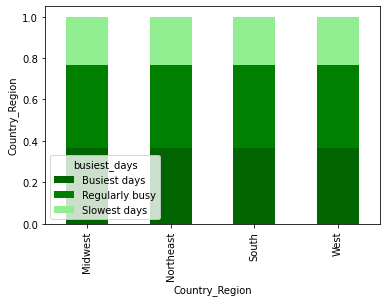

In [31]:
# compare when they use the shop in a week by regions
crosstab_3 = pd.crosstab(all_order['Country_Region'], all_order['busiest_days'],normalize="index")
ax = plt.subplot()
crosstab_3.plot.bar(stacked=True, color=['darkgreen','green','lightgreen'], ax=ax)
ax.set_ylabel('Country_Region')
plt.show()
ax.figure.savefig(r'D:\ドキュメント\Jupyter\CareerFoundry Achievement 4\04 Analysis\Visualizations\region_habit1.png',bbox_inches="tight")

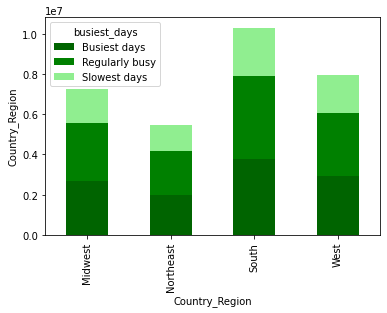

In [32]:
crosstab_4 = pd.crosstab(all_order['Country_Region'], all_order['busiest_days'])
ax = plt.subplot()
crosstab_4.plot.bar(stacked=True, color=['darkgreen','green','lightgreen'], ax=ax)
ax.set_ylabel('Country_Region')
plt.show()
ax.figure.savefig(r'D:\ドキュメント\Jupyter\CareerFoundry Achievement 4\04 Analysis\Visualizations\region_habit.png',bbox_inches="tight")

## There is more order from a region 3, but in terms of placing the order in a week, there is no specific different habit between regions

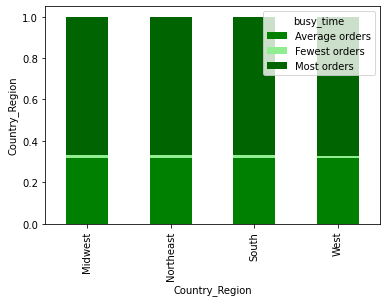

In [14]:
# compare when people use the shop in a day by regions
crosstab_6 = pd.crosstab(all_order['Country_Region'], all_order['busy_time'],normalize="index")
ax = plt.subplot()
crosstab_6.plot.bar(stacked=True, color=['green','lightgreen','darkgreen'], ax=ax)
ax.set_ylabel('Country_Region')
plt.show()
ax.figure.savefig(r'D:\ドキュメント\Jupyter\CareerFoundry Achievement 4\04 Analysis\Visualizations\region_habit_time1.png',bbox_inches="tight")

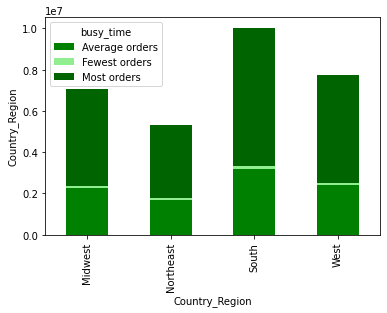

In [15]:
crosstab_5 = pd.crosstab(all_order['Country_Region'], all_order['busy_time'])
ax = plt.subplot()
crosstab_5.plot.bar(stacked=True, color=['green','lightgreen','darkgreen'], ax=ax)
ax.set_ylabel('Country_Region')
plt.show()
ax.figure.savefig(r'D:\ドキュメント\Jupyter\CareerFoundry Achievement 4\04 Analysis\Visualizations\region_habit_time.png',bbox_inches="tight")

## In term of ordering time habits, there is no diffrence beteen regions.

# 6. Question 5.4 Is there a connection between age and family status in terms of ordering habits?

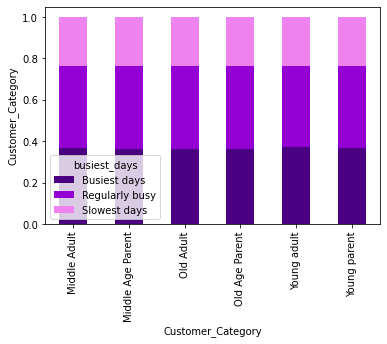

In [16]:
# Percentage of day of week of placing order by customer categories
crosstab_10 = pd.crosstab(all_order['Customer_Category'], all_order['busiest_days'], normalize="index")
ax = plt.subplot()
crosstab_10.plot.bar(stacked=True, color=['indigo','darkviolet','violet'], ax=ax)
ax.set_ylabel('Customer_Category')
plt.show()
ax.figure.savefig(r'D:\ドキュメント\Jupyter\CareerFoundry Achievement 4\04 Analysis\Visualizations\customer_habit1.png',bbox_inches="tight")

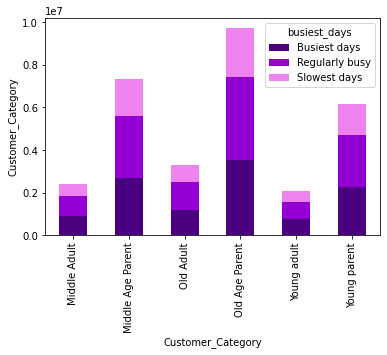

In [17]:
# Number of day of a week of placing order by customer categories
crosstab_9 = pd.crosstab(all_order['Customer_Category'], all_order['busiest_days'])
ax = plt.subplot()
crosstab_9.plot.bar(stacked=True, color=['indigo','darkviolet','violet'], ax=ax)
ax.set_ylabel('Customer_Category')
plt.show()
ax.figure.savefig(r'D:\ドキュメント\Jupyter\CareerFoundry Achievement 4\04 Analysis\Visualizations\customer_habit.png',bbox_inches="tight")

## In terms of time placing order habit, there is no specific difffrence between customer categories.

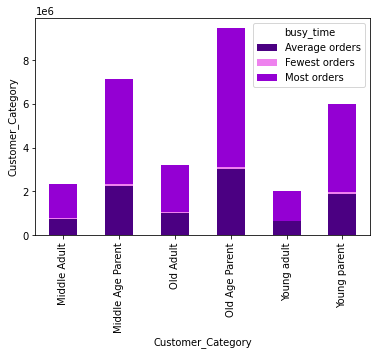

In [18]:
# Number of time of the day of placing order by customer categories
crosstab_16 = pd.crosstab(all_order['Customer_Category'], all_order['busy_time'])
ax = plt.subplot()
crosstab_16.plot.bar(stacked=True, color=['indigo','violet','darkviolet'], ax=ax)
ax.set_ylabel('Customer_Category')
plt.show()
ax.figure.savefig(r'D:\ドキュメント\Jupyter\CareerFoundry Achievement 4\04 Analysis\Visualizations\customer_timehabit.png',bbox_inches="tight")

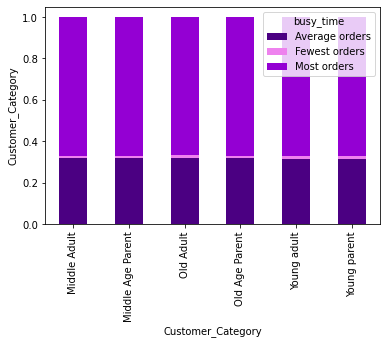

In [19]:
# Percentage of time of the day of placing order by customer categories
crosstab_17 = pd.crosstab(all_order['Customer_Category'], all_order['busy_time'], normalize="index")
ax = plt.subplot()
crosstab_17.plot.bar(stacked=True, color=['indigo','violet','darkviolet'], ax=ax)
ax.set_ylabel('Customer_Category')
plt.show()
ax.figure.savefig(r'D:\ドキュメント\Jupyter\CareerFoundry Achievement 4\04 Analysis\Visualizations\customer_timehabit1.png',bbox_inches="tight")

## In terms of time placing order habit, there is no specific difffrence between customer categories.

# 7. Question 5.5 What different classifications does the demographic information suggest? Age? Income? Certain types of goods? Family status?

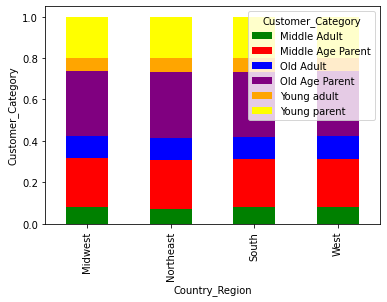

In [22]:
# Compare age group by region
crosstab_1 = pd.crosstab(all_order['Country_Region'], all_order['Customer_Category'], normalize="index")
ax = plt.subplot()
crosstab_1.plot.bar(stacked=True, color=['green','red','blue','purple','orange','yellow'], ax=ax)
ax.set_ylabel('Customer_Category')
plt.show()
ax.figure.savefig(r'D:\ドキュメント\Jupyter\CareerFoundry Achievement 4\04 Analysis\Visualizations\age_region.png',bbox_inches="tight")

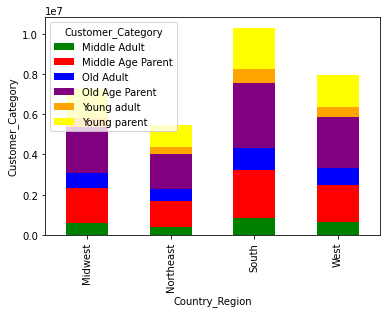

In [23]:
# The number of customer by region by castomer category
crosstab_2 = pd.crosstab(all_order['Country_Region'], all_order['Customer_Category'])
ax = plt.subplot()
crosstab_2.plot.bar(stacked=True, color=['green','red','blue','purple','orange','yellow'], ax=ax)
ax.set_ylabel('Customer_Category')
plt.show()
ax.figure.savefig(r'D:\ドキュメント\Jupyter\CareerFoundry Achievement 4\04 Analysis\Visualizations\age_region1.png',bbox_inches="tight")

## The number of customers are differ by rigions as the Sounth is highest. However the proportion of customer category is almost identical in each regions.

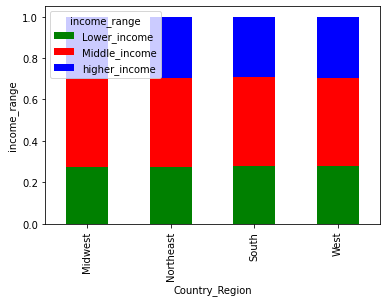

In [29]:
# The percentage of customer by income range by region
crosstab_7 = pd.crosstab(all_order['Country_Region'], all_order['income_range'], normalize="index")
ax = plt.subplot()
crosstab_7.plot.bar(stacked=True, color=['green','red','blue'], ax=ax)
ax.set_ylabel('income_range')
plt.show()
ax.figure.savefig(r'D:\ドキュメント\Jupyter\CareerFoundry Achievement 4\04 Analysis\Visualizations\income_region1.png',bbox_inches="tight")

## The proportion of customer category is almost identical in each regions.

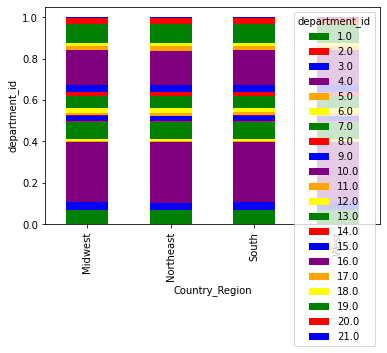

In [30]:
# The percentage of purcherd product by region
crosstab_8 = pd.crosstab(all_order['Country_Region'], all_order['department_id'], normalize="index")
ax = plt.subplot()
crosstab_8.plot.bar(stacked=True, color=['green','red','blue','purple','orange','yellow'], ax=ax)
ax.set_ylabel('department_id')
plt.show()
ax.figure.savefig(r'D:\ドキュメント\Jupyter\CareerFoundry Achievement 4\04 Analysis\Visualizations\depart_region1.png',bbox_inches="tight")

## The proportion of product department is almost identical in each regions.

In [20]:
all_order.head()

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,busiest_day,busiest_days,busy_time,max_order,loyalty_flag,Average_spending,spending_flag,Median_days_since_prior_order,frequency_flag,STATE,Age,date_joined,Number_of_dependents,family_status,income,Country_Region,low activity flag,Customer_Category,income_range,Price_range
0,2539329,1,1,2,8,11.11,196,1,0,Soda,77.0,7.0,9.0,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Alabama,31,2/17/2019,3,married,40423,South,active_customer,Young parent,Lower_income,Mid_range
1,2539329,1,1,2,8,11.11,14084,2,0,Organic Unsweetened Vanilla Almond Milk,91.0,16.0,12.5,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Alabama,31,2/17/2019,3,married,40423,South,active_customer,Young parent,Lower_income,Mid_range
2,2539329,1,1,2,8,11.11,12427,3,0,Original Beef Jerky,23.0,19.0,4.4,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Alabama,31,2/17/2019,3,married,40423,South,active_customer,Young parent,Lower_income,Low_range
3,2539329,1,1,2,8,11.11,26088,4,0,Aged White Cheddar Popcorn,23.0,19.0,4.7,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Alabama,31,2/17/2019,3,married,40423,South,active_customer,Young parent,Lower_income,Low_range
4,2539329,1,1,2,8,11.11,26405,5,0,XL Pick-A-Size Paper Towel Rolls,54.0,17.0,1.0,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.0,Regular customer,Alabama,31,2/17/2019,3,married,40423,South,active_customer,Young parent,Lower_income,Low_range


# 8. Question 5.6 What differences can you find in ordering habits of different customer profiles? Consider the price of orders, the frequency of orders, the products customers are ordering, and anything else you can think of.

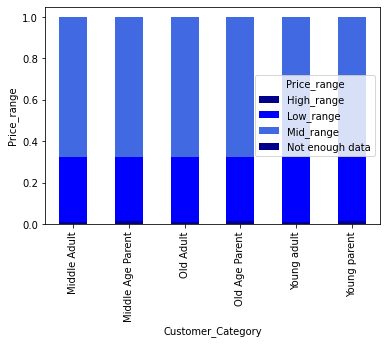

In [42]:
# The percentage of the price range of purchased product by customer category
crosstab_18 = pd.crosstab(all_order['Customer_Category'], all_order['Price_range'], normalize="index")
ax = plt.subplot()
crosstab_18.plot.bar(stacked=True, color=['darkblue','blue','royalblue'], ax=ax)
ax.set_ylabel('Price_range')
plt.show()
ax.figure.savefig(r'D:\ドキュメント\Jupyter\CareerFoundry Achievement 4\04 Analysis\Visualizations\cust_price.png',bbox_inches="tight")

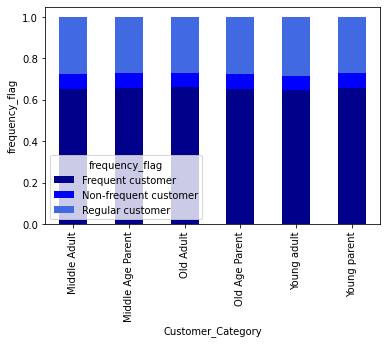

In [43]:
# The percentage of the purchse frequency by customer category
crosstab_19 = pd.crosstab(all_order['Customer_Category'], all_order['frequency_flag'], normalize="index")
ax = plt.subplot()
crosstab_19.plot.bar(stacked=True, color=['darkblue','blue','royalblue'], ax=ax)
ax.set_ylabel('frequency_flag')
plt.show()
ax.figure.savefig(r'D:\ドキュメント\Jupyter\CareerFoundry Achievement 4\04 Analysis\Visualizations\cust_freq.png',bbox_inches="tight")

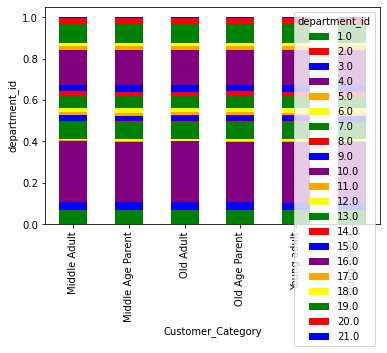

In [44]:
# The percentage of the purchsed products by customer category
crosstab_20 = pd.crosstab(all_order['Customer_Category'], all_order['department_id'], normalize="index")
ax = plt.subplot()
crosstab_20.plot.bar(stacked=True, color=['green','red','blue','purple','orange','yellow'], ax=ax)
ax.set_ylabel('department_id')
plt.show()
ax.figure.savefig(r'D:\ドキュメント\Jupyter\CareerFoundry Achievement 4\04 Analysis\Visualizations\cust_depart.png',bbox_inches="tight")

# There is no difference of ordering habit among different customer profile.